# Test ARIMA prediction

In [1]:
%matplotlib inline
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/home/cartest/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
m3_year = pd.read_excel('../data/M3C.xls',0)
m3_quar = pd.read_excel('../data/M3C.xls',1)
m3_mont = pd.read_excel('../data/M3C.xls',2)
m3_othe = pd.read_excel('../data/M3C.xls',3)

len(m3_year)+len(m3_quar)+len(m3_mont)+len(m3_othe)




3003

In [3]:
m3_year.head()

,Series,N,NF,Category,Starting Year,Unnamed: 5,1,2,3,4,...,38,39,40,41,42,43,44,45,46,47
0,N 1,20,6,MICRO,1975,1,940.66,1084.86,1244.98,1445.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N 2,20,6,MICRO,1975,1,1991.05,2306.40,2604.00,2992.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N 3,20,6,MICRO,1975,1,1461.57,1692.50,2193.82,2459.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N 4,20,6,MICRO,1975,1,744.54,1105.16,1417.40,1838.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N 5,20,6,MICRO,1975,1,4977.18,5248.00,5370.00,6184.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
m3_quar.head()

,Series,N,NF,Category,Starting Year,Starting Quarter,1,2,3,4,...,63,64,65,66,67,68,69,70,71,72
0,N 646,44,8,MICRO,1984,1,3142.63,3190.75,3178.69,3170.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N 647,44,8,MICRO,1984,1,1522.00,1537.80,1602.60,1697.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N 648,46,8,MICRO,1983,3,1549.72,1615.08,1620.33,1634.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N 649,44,8,MICRO,1984,1,2182.60,2189.80,2136.70,2155.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N 650,44,8,MICRO,1984,1,875.51,917.23,999.89,1014.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
m3_mont.head()

,Series,N,NF,Category,Starting Year,Starting Month,1,2,3,4,...,135,136,137,138,139,140,141,142,143,144
0,N1402,68,18,MICRO,1990,1,2640.0,2640.0,2160.0,4200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N1403,68,18,MICRO,1990,1,1680.0,1920.0,120.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N1404,68,18,MICRO,1990,1,1140.0,720.0,4860.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N1405,68,18,MICRO,1990,1,180.0,940.0,2040.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N1406,68,18,MICRO,1990,1,2000.0,1550.0,4450.0,3050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
m3_othe.head()

,Series,N,NF,Category,Unnamed: 4,Unnamed: 5,1,2,3,4,...,95,96,97,98,99,100,101,102,103,104
0,N2830,104,8,MICRO,0,0,3060.42,3021.19,3301.13,3287.03,...,4547.25,4542.51,4381.08,4405.63,4377.02,4371.18,4255.07,4285.44,4260.68,4249.63
1,N2831,104,8,MICRO,0,0,5000.00,4792.64,5302.50,5172.77,...,7198.34,7059.10,5875.23,6765.19,6546.78,6681.54,6130.36,6383.16,6225.59,6222.02
2,N2832,104,8,MICRO,0,0,1256.00,3075.00,3109.70,3317.50,...,8233.25,8104.00,5417.00,3876.50,5123.00,3364.50,1267.50,4154.50,5611.00,4646.50
3,N2833,104,8,MICRO,0,0,7310.00,5417.50,4907.00,4767.50,...,11781.25,8960.00,9340.00,9472.50,8052.50,8320.00,6662.50,7757.50,6345.00,5425.00
4,N2834,104,8,FINANCE,0,0,5303.23,5398.27,5377.98,5346.32,...,5284.89,5308.77,5305.43,5297.80,5300.67,5293.75,5321.88,5308.82,5308.56,5294.78


In [31]:

    
year_dfs = []
for i in range (0,len(m3_year)):
    values = m3_year.iloc[i,6:53]
    values = values.dropna()
    dates_list = [int(x) for x in range(m3_year.iloc[i,4],m3_year.iloc[i,4]+len(values))] 
    dates = pd.Series(dates_list)
    dates.index += 1
    df = pd.concat([dates.rename('date'), values.rename('value')], axis=1)
    year_dfs.append(df)
                  
quar_dfs = []
for i in range (0,len(m3_quar)):
    values = m3_quar.iloc[i,6:77]
    values = values.dropna()
    dates_list = [x for x in np.arange(m3_quar.iloc[i,4],m3_quar.iloc[i,4]+len(values),0.25)] 
    dates = pd.Series(dates_list)
    dates.index += 1
    df = pd.concat([dates.rename('date'), values.rename('value')], axis=1)
    quar_dfs.append(df)
    
mont_dfs = []
for i in range (0,len(m3_mont)):
    values = m3_mont.iloc[i,6:149]
    values = values.dropna()
    dates_list = [x for x in np.arange(m3_mont.iloc[i,4],m3_mont.iloc[i,4]+len(values),0.083333333)] 
    dates = pd.Series(dates_list)
    dates.index += 1
    df = pd.concat([dates.rename('date'), values.rename('value')], axis=1)
    mont_dfs.append(df)
    





         


In [32]:
len(year_dfs)+len(quar_dfs)+len(mont_dfs)+len(othe_dfs)

3003

In [33]:
mont_dfs[0].head()

,date,value
1,1990.000000,2640
2,1990.083333,2640
3,1990.166667,2160
4,1990.250000,4200
5,1990.333333,3360


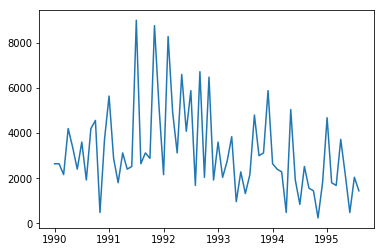

In [34]:
plt.plot(mont_dfs[0]['date'], mont_dfs[0]['value'])
plt.show()